# *조인(JOIN)*

## **목차**

---
##### 1. 조인(Join)이란?   
##### 2. Join 주요 알고리즘 3가지 (NESTED LOOPS, SORT MERGE, HASH)

---

## **1. 조인(Join)이란?**

#### 1. 조인(Join) 용어 설명   
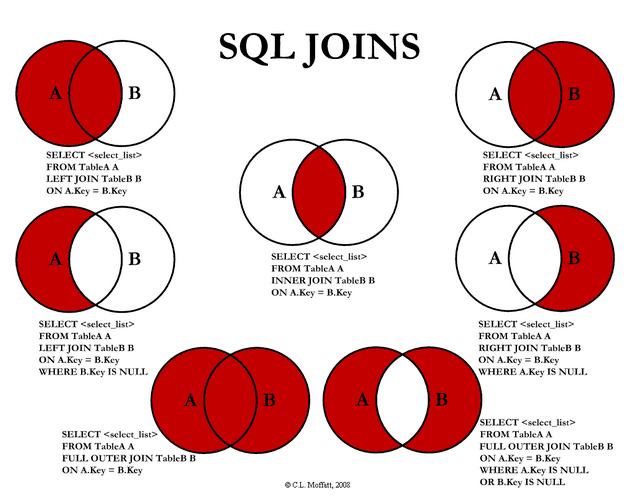   
- Join의 사전적 용어 : 결합하다. 통합하다. 만나다. 참가하다.
- 데이터베이스에서 Join은 '두 개 이상의 테이블'을 연결하여 '하나의 결과 테이블'을 만드는 것이다.
- 데이터 테이블의 병합을 통해 효율적으로 검색하고 처리하는 데 도움을 준다.
- Join은 '데이터 중복을 최소화'하고 '데이터의 일관성'을 유지하기 위함이다.

#### 2. 조인(Join)의 예
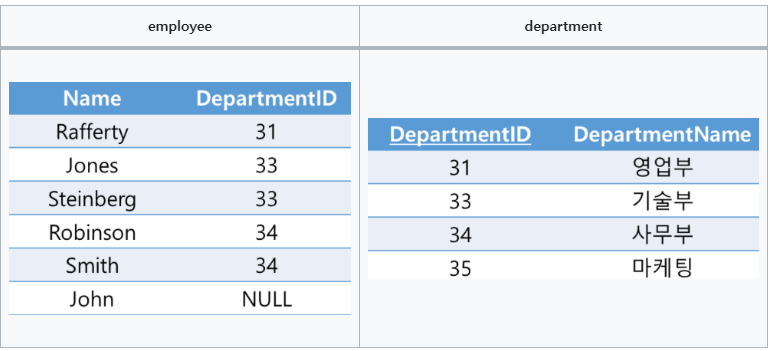   
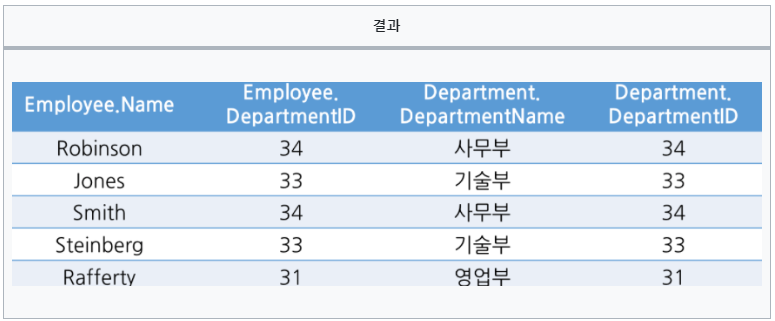   

#### 3. 조인(Join)의 종류
1. 내부 조인 (INNER JOIN)
- 가장 흔한 결합 방식이며 기본 조인의 형식이다.
- 테이블(A, B)의 컬럼 값을 결합함으로써 새로운 테이블을 생성한다.
    ```SQL
    -- 예시 (명시적 조인)
    SELECT * FROM employee
    INNER JOIN department ON employee.DepartmentID = department.DepartmentID;

    -- 예시 (암시적 조인)
    SELECT * FROM employee, department
    WHERE employee.DepartmentID = department.DepartmentID;
    ```   
   
2. 동등 조인 (EQUAL JOIN)
- 비교자 기반의 조인이며, 조인 구문에서 동등비교만을 사용한다.
   
3. 자연 조인 (NATURAL JOIN)
- 동등 조인의 한 유형으로 조인 구문이 조인된 테이블에서 동일한 칼럼명을 가진 2개의 테이블에서 모든 컬럼들을 비교함으로써 암시적으로 일어나는 구문이다.
- 결과적으로 나온 전인된 테이블은 동일한 이름을 가진 컬럼의 각 쌍에 대한 단 하나의 컬럼만 포함하고 있다.
   
4. 교차 조인 (CROSS JOIN)
- 조인되는 두 테이블에서 곱집합을 반환한다.
- 즉, 두 번째 테이블로부터 각 행과 첫 번째 테이블에서 각 행이 한번씩 결합된 열을 만드는 것이다. (M*N)
   
5. 외부 조인 (OUTER JOIN)
- 조인 대상 테이블에서 특정 테이블의 데이터가 모두 필요한 상황에서 외부 조인을 활용하여 효과적으로 결과를 집합하는 것이다.
    1. 왼쪽 외부 조인 (LEFT OUTER JOIN)
        - 우측 테이블에 조인할 컬럼의 값이 없는 경우 사용
        - 좌측 테이블의 모든 데이터를 포함하는 결과 집합을 생성한다.
    2. 오른쪽 외부 조인 (RIGHT OUTER JOIN)
        - 좌측 테이블에 조인할 컬럼의 값이 없는 경우 사용
        - 우측 테이블의 모든 데이터를 포함하는 결과 집합을 생성한다.
    3. 완전 외부 조인 (FULL OUTER JOIN)
        - 양쪽 테이블 모두 OUTER JOIN이 필요할 때 사용한다.

---

## **2. Join 주요 알고리즘 3가지 (NESTED LOOPS, SORT MERGE, HASH)**
- 각 조인 알고리즘은 고유한 특징을 가지고 있어서, 특정한 상황에 가장 적합한 알고리즘을 선택하는 것이 중요하다.
- 예를 들면, 데이터 크기, 인덱스 유무, 메모리 사용 가능성 등을 고려하여 적절한 조인 알고리즘을 선택 해야한다.


#### 1. NESTED LOOP JOIN (중첩 루프 조인)
- 바깥 테이블의 처리 범위를 하나씩 엑세스하면서 추출된 값으로 안쪽 테이블을 조인하는 방식   
    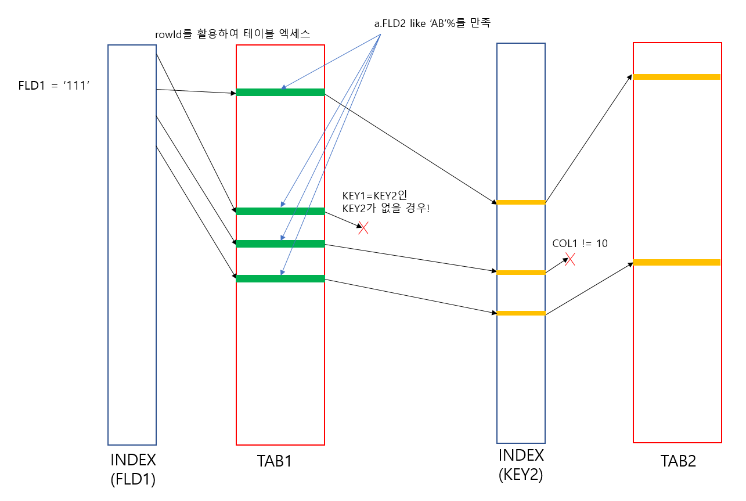   
    ```SQL
    --예시
    -- Driving Table == TAB1 (데이터가 적을수록 유리)
    -- Driven Table == TAB2 (적절한 인덱스가 생성되어 있어야 유리)
    SELECT  * FROM
    FROM TAB1 a, TAB 2
    WHERE a.KEY1 = b.KEY2
    AND a.FLD1 = '111'
    AND a.FLD2 like 'AB%'
    AND b.COL1 = '10';
    ```   
    ##### 1. Nested Loop Join 동작 방식
    1. TAB1(좌측 테이블)이 인덱스 FLD1을 통해 FLD1='111'인 범위 중 첫 번째 로우를 Access한다.
    2. FLD1 인덱스의 ROWID에 해당되는 TAB1의 로우를 Access한다.
        - 엑세스된 로우의 모든 컬럼 값들은 상수값
        - 이 상수값으로 다시 FDL2 LIKE 'AB%'인지 체크하여 성공하면 다음으로 진행
        - 실패 시 (1)로 돌아가서 다음 건으로 이동 후 진행
    3. 2번에서 성공한 엑세스들은 TAB2의 KEY2 인덱스에 대응되는 인덱스 로우를 찾는다.   
    실패 시 다시 (1)로 돌아가 진행
    4. (3)에서 찾아진 KEY2에 해당되는 ROWID를 이용하여 로우에 Access한다.   
    엑세스된 로우에 대해서 COL1 = '10'인지 체크하고, 맞다면 결과를 운반단위로 보낸다.   
    (1 건에 대해서 JOIN 완료)
    5. 다시 (1)로 돌아가 FDL! 인덱스의 두 번째 로우를 읽어 반복한다.
    6. 만약 부분범위 처리가 가능하다면 운반단위가 채워질 때까지만 수행되고 일단 멈추며,   
    전체 범위처리라면 FDL1 범위가 끝날 때 까지 계속해서 반복 수행한다.

    ##### 2. Nested Loop Join 특징
    1. 메모리 사용량이 적다.
    2. 바깥 테이블과 안쪽 테이블의 크기는 성능과 관련이 없다.
    3. Outer 테이블의 조인 컬럼 인덱스 유무가 매우 중요하다.
        - 인덱스가 존재하지 않으면 Outer 테이블에서 읽을 때마다 Inner 테이블을 전체 스캔한다.
        - 과도한 액세스가 발생하면(NL Join이 효과적이지 않으면) Hash Join이나 Sort Merge Join을 검토
    4. 부분범위처리를 하는 경우에 유리해진다.
        - 다른 Join들은 원천적으로 부분범위 처리가 불가능
    5. 처리량이 적은 경우 유리하다.
    6. 조인 순서를 찾는 것이 중요하다.


#### 2. SORT MERGE JOIN (정렬 병합 조인)   
- 조회의 범위가 많을 때 주로 사용하는 알고리즘으로 양쪽 테이블을 각각 Access하여   
그 결과를 정렬하고 정렬한 결과를 차례로 Scan 하면서 연결고리의 조건으로 Merge 하는 방식   
    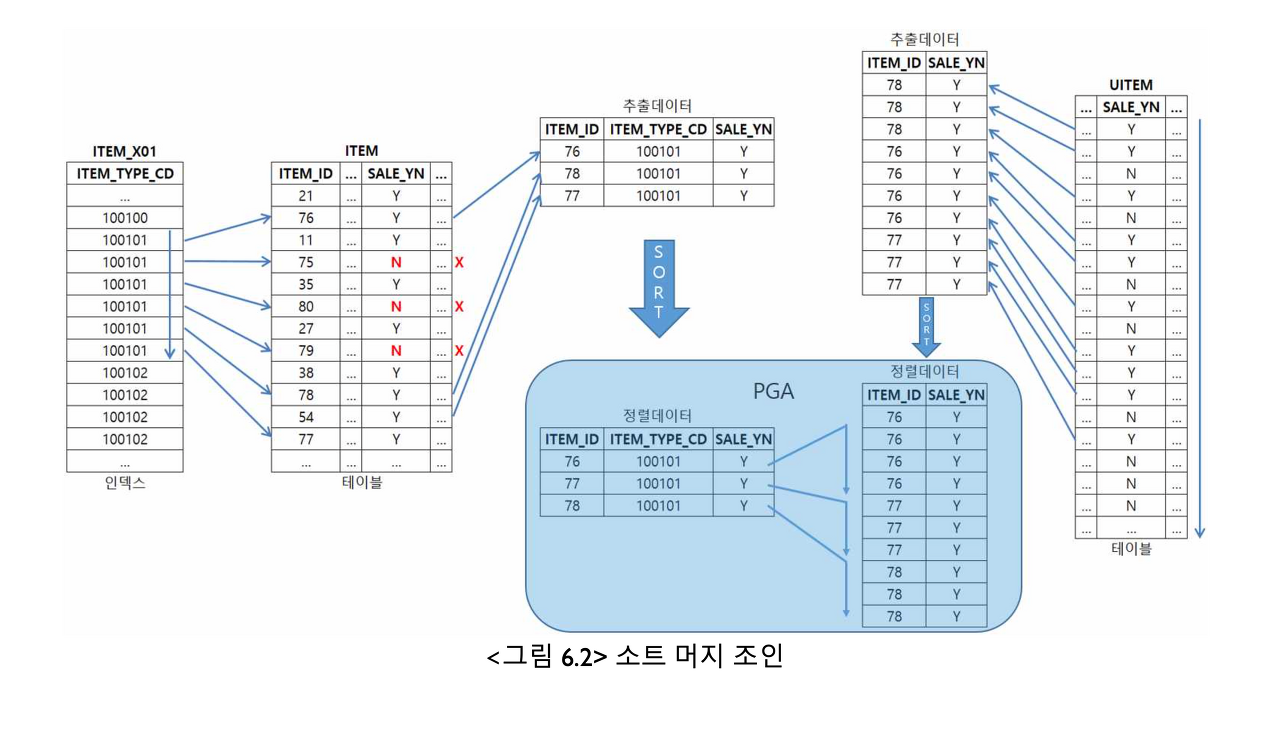   
    ```SQL
    SELECT
        A.*
        , B.*
    FROM   
        ITEM A
        ,UITEM B
    WHERE A.ITEM_ID=B.ITEM_ID   -- 1
    AND A.ITEM_TYPE_CD = '100101'   -- 2 
    AND A.SALE_YN = 'Y'  -- 3 
    AND B.SALE_YN = 'Y'  -- 4
    --- 2 -> 3 -> 4 -> 1 순으로 작동
    ```   
    ##### 1. Sort Merge Join 동작 방식
    1. A 테이블에서 인덱스 ITEM_X01를 통해 ITEM_TYPE_CD = 100100인 것을 스캔하고   
    SALE_YN = 'Y'인 필터조건에 맞는 데이터를 찾는다.
    2. B 테이블에서 SALE_YN = 'Y'에 해당하는 데이터를 찾기 위해 Table Full Scan으로 읽는다.
    3. PGA 공간에서 조인컬럼을 기준으로 정렬을 수행한다.
    4. 두 테이블을 조인한다.
   
    ##### 2. Sort Merge Join 특징
    1. PGA 영역에 저장된 데이터를 이용하기 때문에 빠르므로 Sort 부하만 감수하면 NL 조인보다 유리하다.
    2. 인덱스 유무에 영향을 받지 않는다.
    3. 스캔 위주의 Access 방식을 사용한다.
        - 양쪽 소스 집합에서 정렬 대상을 찾는 작업을 인덱스를 이용해 Random Access 방식으로 처리된다.
        - 이 때 Access 양이 많다면 해당 Join의 이점이 사라질 수 있다.
    4. 대부분 Hash Join 보다 느린 성능이지만, 특정 상황에서 Sort Merge Join 이 유리하다.
        - First Table이 Sort 연산을 대체할 인덱스가 있을 때
        - 조인할 Frist 집합이 이미 정렬되어 있을 때
        - 조인 조건식이 등치(=) 조건이 아닐 때
    5. 두 결과 집합의 크기가 많이 차이나는 경우에는 비효율적이다.
        - 어느 한 쪽이라도 정렬 작업이 종료되지 않으면 Join을 할 수 없다.    
        따라서, 집합의 크기가 많이 차이나면 날수록 한 쪽의 대기 상태가 길어져 비효율적이다.


#### 3. HASH JOIN (해시 조인)
- 위 두 조인 방법의 문제점을 해결하기 위해 사용 가능한 것이 Hash Join 이다.
- 두 테이블 중 작은 테이블을 Hash 메모리에 로딩하고 두 테이블의 조인 키를 사용해서 Join하는 방식   
    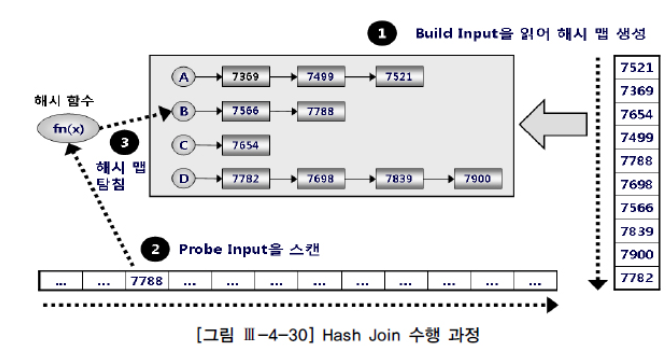   
    ##### 1. Hash Join의 동작 방식   
    1. 선행 테이블에서 주어진 조건을 만족하는 행을 찾음
    2. 선행 테이블의 조인 키를 기준으로 해쉬 함수를 적용하여 해쉬 테이블을 생성
        - 조인 칼럼과 SELECT 절에서 필요로 하는 칼럼도 함께 저장
    3. 1~2 번 작업을 선행 테이블의 조건을 만족하는 모든 행에 대해 반복 수행
    3. 후행 테이블에서 주어진 조건을 만족하는 행을 찾음
    4. 후행 테이블의 조인 키를 기준으로 해쉬 함수를 적용하여 해당 버킷을 찾음
        - 조인 키를 이용해서 실제 조인될 데이터를 찾음
    5. 조인에 성공하면 추출 버퍼에 넣음
    6. 3~5 번 작업을 후행 테이블의 조건을 만족하는 모든 행에 대해서 반복 수행

    ##### 2. Hash join 사용 케이스
    1. Join 컬럼에 적당한 인덱스가 없어 NL join이 비효율적일 때
    2. Join Access 량이 많아 Random Access 부하가 심해 NL Join이 비효율적일 때
    3. Sort Merge Join을 하기에는 두 테이블이 너무 커 Sort 부하가 심할 때
    4. 수행빈도가 낮고 쿼리 수행 시간이 오래 걸리는 대용량 테이블을 Join 할 때

    ##### 3. Hash join 특징
    1. 해시값을 이용하여 테이블을 조인
    2. 부하가 많이 발생하는 Sort Merge Join을 보완하기 위한 방법으로 Sort 대신 Hash를 이용
    3. Random Access와 정렬에 대한 부담을 해결할 수 있음
    4. 대용량 데이터 처리를 위한 최적의 솔루션
    5. 해시 테이블 생성 후, Nested Loop 처럼 순차적으로 처리 수행
    6. Join의 결과는 정렬하지 않은 상태로 출력